In [1]:
import torch
torch.cuda.is_available()

True

### tensor的变换

In [4]:
t = torch.rand(3, 5)
t, t.size()

(tensor([[0.6382, 0.6660, 0.3566, 0.6016, 0.7850],
         [0.5392, 0.9292, 0.8651, 0.8228, 0.5358],
         [0.0325, 0.5961, 0.8329, 0.1997, 0.9621]]),
 torch.Size([3, 5]))

In [ ]:
### 交换张量的维度
torch.transpose(t, 0, 1)

tensor([[0.6382, 0.5392, 0.0325],
        [0.6660, 0.9292, 0.5961],
        [0.3566, 0.8651, 0.8329],
        [0.6016, 0.8228, 0.1997],
        [0.7850, 0.5358, 0.9621]])

In [9]:
help(torch.transpose(t, 0, 1))

Help on Tensor in module torch object:

class Tensor(torch._C.TensorBase)
 |  Method resolution order:
 |      Tensor
 |      torch._C.TensorBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__ = abs(...)
 |  
 |  __array__(self, dtype=None)
 |  
 |  __array_wrap__(self, array)
 |      # Wrap Numpy array again in a suitable tensor when done, to support e.g.
 |      # `numpy.sin(tensor) -> tensor` or `numpy.greater(tensor, 0) -> ByteTensor`
 |  
 |  __contains__(self, element: Any, /) -> bool
 |      Check if `element` is present in tensor
 |      
 |      Args:
 |          element (Tensor or scalar): element to be checked
 |              for presence in current tensor"
 |  
 |  __deepcopy__(self, memo)
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __dlpack__(self, stream=None)
 |      Creates a DLpack `capsule https://data-apis.org/array-api/latest/design_topics/data_interchange.html#data-interchange`_
 |      of the current tensor to be 

In [10]:
t = torch.zeros(30)
t.reshape(5,6)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [13]:
### 移除变量对应的维度
t = torch.zeros(1, 2, 1, 4, 1)
t, torch.squeeze(t, 2)

(tensor([[[[[0.],
            [0.],
            [0.],
            [0.]]],
 
 
          [[[0.],
            [0.],
            [0.],
            [0.]]]]]),
 tensor([[[[0.],
           [0.],
           [0.],
           [0.]],
 
          [[0.],
           [0.],
           [0.],
           [0.]]]]))

### 数学运算

In [15]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [16]:
t1, t2

(tensor([[ 0.5153, -0.4414],
         [-0.1939,  0.4694],
         [-0.9414,  0.5997],
         [-0.2057,  0.5087],
         [ 0.1390, -0.1224]]),
 tensor([[ 0.8590,  0.7056],
         [-0.3406, -1.2720],
         [-1.1948,  0.0250],
         [-0.7627,  1.3969],
         [-0.3245,  0.2879]]))

In [ ]:
### 对应元素点积
torch.multiply(t1, t2)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [19]:
torch.mean(t1, axis = 0), torch.mean(t1, axis = 1)

(tensor([-0.1373,  0.2028]),
 tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083]))

In [ ]:
### t1*t2^T 矩阵运算
torch.matmul(t1, torch.transpose(t2, 0, 1))

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [21]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999])]

In [22]:
torch.split(t, split_size_or_sections=[3, 2, 1])

(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293]), tensor([0.7999]))

In [23]:
A = torch.ones(3)
B = torch.zeros(2)
torch.cat([A, B], axis=0)

tensor([1., 1., 1., 0., 0.])

In [24]:
A = torch.ones(3)
B = torch.zeros(3)

torch.stack([A, B], axis=1)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

### torch和sklearn拟合线性模型

In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X_train = np.random.uniform(low = 0, high = 100, size = 100)
error = np.random.normal(loc = 0.1, scale = 1.0, size = 100)
y_train = 0.5 * X_train + error ** 2

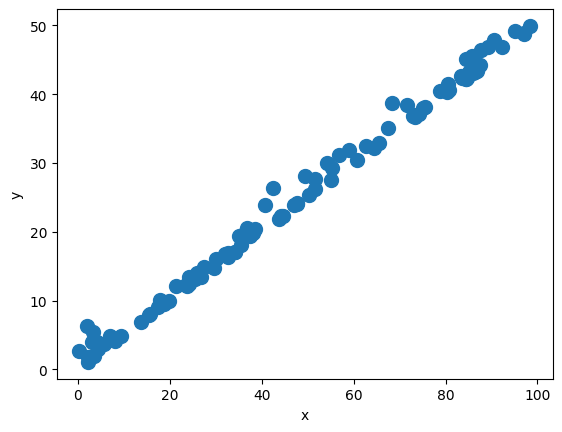

In [40]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()

y_train = torch.from_numpy(y_train).float()
X_train_norm, y_train

(tensor([ 0.5231, -0.6383,  0.2048,  1.2984,  1.2412, -1.4593,  0.3361,  1.1945,
         -0.7925,  1.0572, -1.5402,  0.0885, -0.4351, -1.3335, -0.4706,  1.2650,
         -1.5471,  1.0745, -0.3845, -0.5012, -1.5778, -1.1877,  1.3045, -0.9295,
         -0.4534, -1.0639,  0.5590,  1.1608,  0.8788, -0.4967, -0.8473, -0.3529,
         -0.0656,  1.2028, -1.0220, -1.0497,  1.5597,  0.8541, -1.3787,  1.2749,
          1.2491,  0.8219, -1.5036, -1.4135,  0.0180, -0.9840, -0.2158,  1.2000,
         -0.0455,  1.2730,  0.4627, -0.0401,  1.1657, -0.8362, -1.1285,  0.0453,
          0.8105,  1.0076,  1.1969, -0.5500, -0.4074, -0.7761, -1.5074, -0.6552,
         -0.2796,  0.8188, -0.1735,  1.6697, -1.5294,  1.0638,  1.6205,  0.1795,
          1.6226, -1.6393, -1.1202,  0.7631,  0.3967,  1.4586, -1.5794,  1.4020,
         -0.8330,  0.8961,  1.2177,  0.6245, -0.1587, -1.5872, -0.3647, -0.8596,
          0.6524,  1.3589, -0.7457, -0.1430,  0.0859, -0.5718, -0.7271,  0.2653,
         -0.5497, -1.3938,  

In [42]:
train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [43]:
train_dl.__len__()

100

In [48]:
import torch.nn as nn

num_epochs = 200
learning_rate = 0.001
log_epochs = 10

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction = 'mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)
        # print(pred)

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 101.6534
Epoch 10  Loss 20.0962
Epoch 20  Loss 0.6148
Epoch 30  Loss 0.2295
Epoch 40  Loss 0.0816
Epoch 50  Loss 1.0111
Epoch 60  Loss 0.2388
Epoch 70  Loss 0.2433
Epoch 80  Loss 0.2613
Epoch 90  Loss 0.8354
Epoch 100  Loss 0.0528
Epoch 110  Loss 0.3740
Epoch 120  Loss 6.7424
Epoch 130  Loss 3.3228
Epoch 140  Loss 0.8933
Epoch 150  Loss 0.1442
Epoch 160  Loss 0.0509
Epoch 170  Loss 0.3743
Epoch 180  Loss 0.9801
Epoch 190  Loss 1.1242


In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [50]:
# model = nn.Linear(input_size, output_size)

# loss_fn = nn.MSELoss(reduction = 'mean')

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)
        # print(pred)

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 0.1316
Epoch 10  Loss 0.4108
Epoch 20  Loss 3.2559
Epoch 30  Loss 0.9408
Epoch 40  Loss 0.0550
Epoch 50  Loss 3.8824
Epoch 60  Loss 0.8900
Epoch 70  Loss 0.1848
Epoch 80  Loss 3.8712
Epoch 90  Loss 0.9358
Epoch 100  Loss 0.2300
Epoch 110  Loss 1.1342
Epoch 120  Loss 0.4512
Epoch 130  Loss 0.8846
Epoch 140  Loss 0.9435
Epoch 150  Loss 1.0363
Epoch 160  Loss 0.3731
Epoch 170  Loss 0.8364
Epoch 180  Loss 0.9713
Epoch 190  Loss 0.0637


In [51]:
! pip install pytorch-lightning

   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   ------------ --------------------------- 262.1/815.2 kB ? eta -:--:--
   ------------ --------------------------- 262.1/815.2 kB ? eta -:--:--
   ------------------------ ------------- 524.3/815.2 kB 644.1 kB/s eta 0:00:01
   -------------------------------------- 815.2/815.2 kB 822.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/926.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.4 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/926.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 926.4/926.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
